# Emotion Detection using ML

Here we are creating a Naive Bayes Text Emotion Detection model.
It can detect following six emotions :- Sadness, Joy, Love, Anger, Fear, Surprise

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Processing the data to be fed into Model

In [54]:
# importing dataset
data = pd.concat([pd.read_csv("data/test.csv"), pd.read_csv("data/training.csv"), pd.read_csv("data/validation.csv")])
data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


Number of data points = 20000
Number of null values in dataset = 0

List of emotions in dataset = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
Number of data points for each emotion = [5797 6761 1641 2709 2373  719]


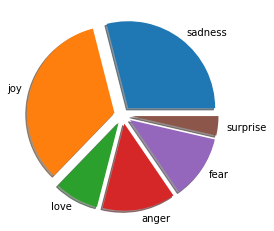

In [55]:
# Exploratory data analysis

print(f'Number of data points = {data.shape[0]}')
print(f'Number of null values in dataset = {data.isnull().sum().sum()}')
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
arr = np.array([len(data['label'][data.label == x]) for x in range(0,6)])
print('\nList of emotions in dataset =', emotions)
print('Number of data points for each emotion =', arr)
plt.pie(arr, labels = emotions, shadow=True, explode=[0.1 for _ in range(0, len(emotions))])
plt.show()

In [56]:
# Text preprocessing

# Text is already preprocessed

data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [57]:
# Converting sentiments to integers

# This function can convert emotions to integers and also vice versa
def convert_emotions(x):
    try:
        x = int(x)
        return emotions[x]
    except ValueError:
        return emotions.index(x)
    
data['emotions'] = data["label"].apply(convert_emotions)
data.head()

,text,label,emotions
0,im feeling rather rotten so im not very ambiti...,0,sadness
1,im updating my blog because i feel shitty,0,sadness
2,i never make her separate from me because i do...,0,sadness
3,i left with my bouquet of red and yellow tulip...,1,joy
4,i was feeling a little vain when i did this one,0,sadness


In [58]:
# Splitting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state = 1)

print(f"Training data = {X_train.shape[0]}")
print(f"Testing data = {X_test.shape[0]}")

Training data = 16000
Testing data = 4000


In [59]:
# Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
train_data = cv.fit_transform(X_train)
test_data = cv.transform(X_test)
# Final Data for training :- train_data, y_train
# Final Data for testing :- test_data, y_test

# Developing the Model

In [60]:
from sklearn.naive_bayes import MultinomialNB

detector = MultinomialNB(fit_prior=False)
detector.fit(train_data, y_train)

MultinomialNB(fit_prior=False)

# Evaluating the Model

In [61]:
from sklearn.metrics import accuracy_score

predictions = detector.predict(test_data)
print("Accuracy score :-", accuracy_score(y_test, predictions))

Accuracy score :- 0.78375


# Storing the model for future use

In [62]:
import joblib as jl

class EmotionDetector:
    def __init__(self, model, count_vectorizer):
        self.model = model
        self.cv = count_vectorizer
    
    def predict(self, x):
        data = self.cv.transform(x)
        output = self.model.predict(data)
        return self.convert_emotions(output)
    
    @staticmethod
    # This convert_emotions func is different from one used above
    # This one is made to accept numpy array as argument
    def convert_emotions(x):
        emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
        try:
            x = np.vectorize(int)(x)
            return np.vectorize(lambda i: emotions[i])(x)
        except ValueError:
            return np.vectorize(lambda i: emotions.index(i))(x)
        
ed = EmotionDetector(detector, cv)

jl.dump(ed, 'emotion_detector.model')

['emotion_detector.model']

 # Extra code (Not used in this modal building)

In [42]:
import re
import string
import contractions

# Preprocessor for Twitter text
def preprocess_forTwitter(text):
    x = str(text).lower()
    punctuations = string.punctuation.replace("'", '')
    x = re.sub('@[\w]+','', x).translate(str.maketrans(punctuations, ' '*len(punctuations)))
    
    fixed = []
    for word in x.split():
        fixed.append(contractions.fix(word))
    
    x = ' '.join(fixed).replace("listenin", "listening").replace(' n ', ' and ')
    return x